# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="D:\deep-reinforcement-learning\p3_collab-compet\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Solve:  Train the Agent with DDPG

In [5]:
# Create the Agent
from ddpg_agent_multi import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=2, agent_size=num_agents)

Episode 1	Average Score: 0.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: 0.00
Episode 4	Average Score: 0.00
Episode 5	Average Score: 0.02
Episode 6	Average Score: 0.02
Episode 7	Average Score: 0.01
Episode 8	Average Score: 0.01
Episode 9	Average Score: 0.01
Episode 10	Average Score: 0.02
Episode 11	Average Score: 0.02
Episode 12	Average Score: 0.02
Episode 13	Average Score: 0.02
Episode 14	Average Score: 0.01
Episode 15	Average Score: 0.01
Episode 16	Average Score: 0.01
Episode 17	Average Score: 0.01
Episode 18	Average Score: 0.01
Episode 19	Average Score: 0.01
Episode 20	Average Score: 0.01
Episode 21	Average Score: 0.01
Episode 22	Average Score: 0.01
Episode 23	Average Score: 0.01
Episode 24	Average Score: 0.01
Episode 25	Average Score: 0.01
Episode 26	Average Score: 0.01
Episode 27	Average Score: 0.01
Episode 28	Average Score: 0.02
Episode 29	Average Score: 0.02
Episode 30	Average Score: 0.02
Episode 31	Average Score: 0.02
Episode 32	Average Score: 0.02
Episode 33	Averag

Episode 261	Average Score: 0.00
Episode 262	Average Score: 0.00
Episode 263	Average Score: 0.00
Episode 264	Average Score: 0.00
Episode 265	Average Score: 0.00
Episode 266	Average Score: 0.00
Episode 267	Average Score: 0.00
Episode 268	Average Score: 0.00
Episode 269	Average Score: 0.00
Episode 270	Average Score: 0.00
Episode 271	Average Score: 0.00
Episode 272	Average Score: 0.00
Episode 273	Average Score: 0.00
Episode 274	Average Score: 0.00
Episode 275	Average Score: 0.00
Episode 276	Average Score: 0.00
Episode 277	Average Score: 0.00
Episode 278	Average Score: 0.00
Episode 279	Average Score: 0.00
Episode 280	Average Score: 0.00
Episode 281	Average Score: 0.00
Episode 282	Average Score: 0.00
Episode 283	Average Score: 0.00
Episode 284	Average Score: 0.00
Episode 285	Average Score: 0.00
Episode 286	Average Score: 0.00
Episode 287	Average Score: 0.00
Episode 288	Average Score: 0.00
Episode 289	Average Score: 0.00
Episode 290	Average Score: 0.00
Episode 291	Average Score: 0.00
Episode 

Episode 518	Average Score: 0.01
Episode 519	Average Score: 0.01
Episode 520	Average Score: 0.01
Episode 521	Average Score: 0.01
Episode 522	Average Score: 0.01
Episode 523	Average Score: 0.01
Episode 524	Average Score: 0.01
Episode 525	Average Score: 0.01
Episode 526	Average Score: 0.01
Episode 527	Average Score: 0.01
Episode 528	Average Score: 0.01
Episode 529	Average Score: 0.01
Episode 530	Average Score: 0.01
Episode 531	Average Score: 0.01
Episode 532	Average Score: 0.01
Episode 533	Average Score: 0.01
Episode 534	Average Score: 0.01
Episode 535	Average Score: 0.01
Episode 536	Average Score: 0.01
Episode 537	Average Score: 0.01
Episode 538	Average Score: 0.01
Episode 539	Average Score: 0.01
Episode 540	Average Score: 0.01
Episode 541	Average Score: 0.01
Episode 542	Average Score: 0.01
Episode 543	Average Score: 0.01
Episode 544	Average Score: 0.01
Episode 545	Average Score: 0.01
Episode 546	Average Score: 0.01
Episode 547	Average Score: 0.01
Episode 548	Average Score: 0.01
Episode 

Episode 775	Average Score: 0.06
Episode 776	Average Score: 0.07
Episode 777	Average Score: 0.07
Episode 778	Average Score: 0.07
Episode 779	Average Score: 0.07
Episode 780	Average Score: 0.07
Episode 781	Average Score: 0.07
Episode 782	Average Score: 0.07
Episode 783	Average Score: 0.07
Episode 784	Average Score: 0.07
Episode 785	Average Score: 0.07
Episode 786	Average Score: 0.08
Episode 787	Average Score: 0.07
Episode 788	Average Score: 0.07
Episode 789	Average Score: 0.07
Episode 790	Average Score: 0.07
Episode 791	Average Score: 0.07
Episode 792	Average Score: 0.07
Episode 793	Average Score: 0.07
Episode 794	Average Score: 0.07
Episode 795	Average Score: 0.07
Episode 796	Average Score: 0.07
Episode 797	Average Score: 0.08
Episode 798	Average Score: 0.08
Episode 799	Average Score: 0.08
Episode 800	Average Score: 0.07
Episode 801	Average Score: 0.08
Episode 802	Average Score: 0.08
Episode 803	Average Score: 0.08
Episode 804	Average Score: 0.08
Episode 805	Average Score: 0.08
Episode 

Episode 1031	Average Score: 0.33
Episode 1032	Average Score: 0.33
Episode 1033	Average Score: 0.32
Episode 1034	Average Score: 0.32
Episode 1035	Average Score: 0.32
Episode 1036	Average Score: 0.32
Episode 1037	Average Score: 0.32
Episode 1038	Average Score: 0.32
Episode 1039	Average Score: 0.32
Episode 1040	Average Score: 0.31
Episode 1041	Average Score: 0.31
Episode 1042	Average Score: 0.31
Episode 1043	Average Score: 0.31
Episode 1044	Average Score: 0.31
Episode 1045	Average Score: 0.30
Episode 1046	Average Score: 0.29
Episode 1047	Average Score: 0.29
Episode 1048	Average Score: 0.29
Episode 1049	Average Score: 0.30
Episode 1050	Average Score: 0.30
Episode 1051	Average Score: 0.30
Episode 1052	Average Score: 0.31
Episode 1053	Average Score: 0.30
Episode 1054	Average Score: 0.30
Episode 1055	Average Score: 0.30
Episode 1056	Average Score: 0.30
Episode 1057	Average Score: 0.30
Episode 1058	Average Score: 0.31
Episode 1059	Average Score: 0.33
Episode 1060	Average Score: 0.33
Episode 10

Episode 1280	Average Score: 0.39
Episode 1281	Average Score: 0.39
Episode 1282	Average Score: 0.39
Episode 1283	Average Score: 0.38
Episode 1284	Average Score: 0.38
Episode 1285	Average Score: 0.38
Episode 1286	Average Score: 0.38
Episode 1287	Average Score: 0.37
Episode 1288	Average Score: 0.37
Episode 1289	Average Score: 0.36
Episode 1290	Average Score: 0.36
Episode 1291	Average Score: 0.36
Episode 1292	Average Score: 0.36
Episode 1293	Average Score: 0.36
Episode 1294	Average Score: 0.36
Episode 1295	Average Score: 0.36
Episode 1296	Average Score: 0.35
Episode 1297	Average Score: 0.35
Episode 1298	Average Score: 0.35
Episode 1299	Average Score: 0.35
Episode 1300	Average Score: 0.33
Episode 1301	Average Score: 0.34
Episode 1302	Average Score: 0.34
Episode 1303	Average Score: 0.33
Episode 1304	Average Score: 0.33
Episode 1305	Average Score: 0.33
Episode 1306	Average Score: 0.33
Episode 1307	Average Score: 0.32
Episode 1308	Average Score: 0.32
Episode 1309	Average Score: 0.32
Episode 13

Episode 1529	Average Score: 0.31
Episode 1530	Average Score: 0.31
Episode 1531	Average Score: 0.31
Episode 1532	Average Score: 0.32
Episode 1533	Average Score: 0.33
Episode 1534	Average Score: 0.32
Episode 1535	Average Score: 0.32
Episode 1536	Average Score: 0.33
Episode 1537	Average Score: 0.33
Episode 1538	Average Score: 0.32
Episode 1539	Average Score: 0.32
Episode 1540	Average Score: 0.32
Episode 1541	Average Score: 0.32
Episode 1542	Average Score: 0.32
Episode 1543	Average Score: 0.32
Episode 1544	Average Score: 0.32
Episode 1545	Average Score: 0.31
Episode 1546	Average Score: 0.31
Episode 1547	Average Score: 0.31
Episode 1548	Average Score: 0.31
Episode 1549	Average Score: 0.31
Episode 1550	Average Score: 0.31
Episode 1551	Average Score: 0.30
Episode 1552	Average Score: 0.30
Episode 1553	Average Score: 0.30
Episode 1554	Average Score: 0.30
Episode 1555	Average Score: 0.30
Episode 1556	Average Score: 0.29
Episode 1557	Average Score: 0.29
Episode 1558	Average Score: 0.30
Episode 15

Episode 1778	Average Score: 0.71
Episode 1779	Average Score: 0.71
Episode 1780	Average Score: 0.71
Episode 1781	Average Score: 0.70
Episode 1782	Average Score: 0.69
Episode 1783	Average Score: 0.69
Episode 1784	Average Score: 0.69
Episode 1785	Average Score: 0.70
Episode 1786	Average Score: 0.69
Episode 1787	Average Score: 0.69
Episode 1788	Average Score: 0.69
Episode 1789	Average Score: 0.70
Episode 1790	Average Score: 0.70
Episode 1791	Average Score: 0.71
Episode 1792	Average Score: 0.71
Episode 1793	Average Score: 0.71
Episode 1794	Average Score: 0.71
Episode 1795	Average Score: 0.70
Episode 1796	Average Score: 0.71
Episode 1797	Average Score: 0.72
Episode 1798	Average Score: 0.72
Episode 1799	Average Score: 0.74
Episode 1800	Average Score: 0.77
Episode 1801	Average Score: 0.75
Episode 1802	Average Score: 0.75
Episode 1803	Average Score: 0.75
Episode 1804	Average Score: 0.77
Episode 1805	Average Score: 0.77
Episode 1806	Average Score: 0.77
Episode 1807	Average Score: 0.78
Episode 18

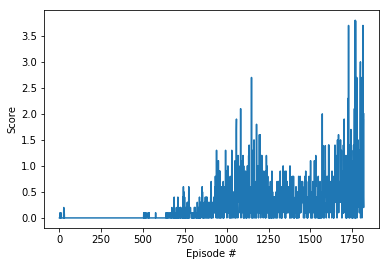

In [6]:
# Train the Agent

def ddpg(n_episodes=3000, max_t=1000, print_every=100):
    """Deep Deterministic Policy Gradients DDPG  from Pendulum exercise was employed: 
       Params:
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
            print_every(int): print update 
    """
    scores_deque = deque(maxlen=print_every)
    scores = [] # list containing scores from each episode
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations # get the current state
        #print('states= ', states.shape)
        agent.reset() #initialize agents 
        scores_a1 = 0 
        scores_a2 = 0
        max_score = 0
        for t in range(max_t):
            actions=[] # clear actions
            actions = agent.act(states) # select an action   
            #print('actions= ',np.array(actions).shape)
            action_info = env.step(actions)[brain_name] # get enviroment info
            next_states = action_info.vector_observations # get next state (for each agent)
            #print('next states= ', next_states.shape)
            rewards = action_info.rewards # get reward (for each agent)
            #print('rewards= ', np.array(rewards).shape)
            dones = action_info.local_done # see if episode finished
            #print('dones= ', np.array(dones).shape) 
            # Save experiences / rewards :
            for index in range(0,num_agents):
                agent.save_experience(states[index], actions[index], rewards[index], next_states[index], dones[index])
            agent.multi_step(t) #Train each agent 
            states = next_states # roll over states to next time step
            scores_a1 = rewards[0] 
            scores_a2 = rewards[1]
            max_score += max(scores_a1,scores_a2)

            if np.any(dones):
                break 
 
        
        scores_deque.append(np.mean(max_score))
        scores.append(np.mean(max_score))         # save most recent score
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="\n")   
        torch.save(agent.actor_local.state_dict(),  'checkpoint_actor.pth' )
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores_deque)>=0.9:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
            
    return scores

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Watch a Smart Agent!

In [6]:
# Play the Trained Agent
# load the weights from file
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state (for each agent)
scores = np.zeros(num_agents)                      # initialize the score (for each agent)                                         # initialize the score
while True:
    actions = agent.act(states)                # select an action (for each agent)
    actions = np.clip(actions, -1, 1)          # all actions between -1 and 1      
    env_info = env.step(actions)[brain_name]   # send the action to the environment                  
    next_states =  env_info.vector_observations# get the next state (for each agent)
    rewards = env_info.rewards                 # get the reward (for each agent)
    dones =env_info.local_done                 # see if episode has finished
    scores += rewards                          # update the score (for each agent)
    states = next_states                       # roll over the state to next time step
    if np.any(dones):                          # exit loop if episode finished
        break
        #pass
    
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))


Total score (averaged over agents) this episode: 0.44500000681728125


In [7]:
env.close()